<a href="https://colab.research.google.com/github/kaykaushal/spatial_ds_airpoluttion/blob/main/air_polution_gis_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of Air Pollution-NO2 Measured in Delhi

In [20]:
# Impoer Drive for data collection
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
! pip install geopandas

In [21]:
from pathlib import Path
import random
from typing import Dict, List, Union
#from cloudpathlib import S3Path, S3Client
import geopandas as gpd #! pip install geopandas
import pandas as pd

In [22]:
import numpy as np 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [23]:
# Read data & check head values
data = pd.read_csv('/content/drive/MyDrive/Driven_Data/NASA-NO2/Data/location_train_data.csv', index_col=0)
data.head()

,datetime,grid_id,value,location,tz,wkt
0,2019-01-01T08:00:00Z,3A3IE,8.695000,Los Angeles (SoCAB),Etc/GMT+8,POLYGON ((-117.8889090614936 34.13085940091023...
1,2019-01-01T08:00:00Z,3S31A,10.496667,Los Angeles (SoCAB),Etc/GMT+8,POLYGON ((-117.9338248256995 33.79558357488509...
2,2019-01-01T08:00:00Z,7II4T,37.208333,Los Angeles (SoCAB),Etc/GMT+8,POLYGON ((-118.0236563541115 33.98201108613195...
3,2019-01-01T08:00:00Z,8BOQH,9.791667,Los Angeles (SoCAB),Etc/GMT+8,POLYGON ((-118.4278982319653 34.01924766510738...
4,2019-01-01T08:00:00Z,A2FBI,4.308333,Los Angeles (SoCAB),Etc/GMT+8,POLYGON ((-117.3948356552278 33.98201108613195...


In [24]:
# check location wise  
data.location.value_counts()

Los Angeles (SoCAB)    17473
Delhi                  14105
Taipei                  4553
Name: location, dtype: int64

In [25]:
# Taking sample of delhi location data
no2_dl_df = data[data.location == 'Delhi']
no2_dl_df.head()

,datetime,grid_id,value,location,tz,wkt
25,2019-01-01T18:30:00Z,D7S1G,80.500000,Delhi,Asia/Calcutta,"POLYGON ((77.34944754836873 28.66494381399507,..."
59,2019-01-02T18:30:00Z,1Z2W7,23.862031,Delhi,Asia/Calcutta,"POLYGON ((77.30453178416276 28.54664454217707,..."
60,2019-01-02T18:30:00Z,6EIL6,52.001562,Delhi,Asia/Calcutta,"POLYGON ((77.07995296313287 28.54664454217707,..."
61,2019-01-02T18:30:00Z,7334C,68.770769,Delhi,Asia/Calcutta,"POLYGON ((77.12486872733885 28.54664454217707,..."
62,2019-01-02T18:30:00Z,78V83,44.714286,Delhi,Asia/Calcutta,"POLYGON ((76.94520567051495 28.54664454217707,..."


In [26]:
no2_dl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14105 entries, 25 to 36130
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  14105 non-null  object 
 1   grid_id   14105 non-null  object 
 2   value     14105 non-null  float64
 3   location  14105 non-null  object 
 4   tz        14105 non-null  object 
 5   wkt       14105 non-null  object 
dtypes: float64(1), object(5)
memory usage: 771.4+ KB


In [27]:
no2_dl_df['Coordinates'] = gpd.GeoSeries.from_wkt(no2_dl_df['wkt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
no2_dl_gdf = gpd.GeoDataFrame(no2_dl_df, geometry='Coordinates')
no2_dl_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14105 entries, 25 to 36130
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   datetime     14105 non-null  object  
 1   grid_id      14105 non-null  object  
 2   value        14105 non-null  float64 
 3   location     14105 non-null  object  
 4   tz           14105 non-null  object  
 5   wkt          14105 non-null  object  
 6   Coordinates  14105 non-null  geometry
dtypes: float64(1), geometry(1), object(5)
memory usage: 881.6+ KB


In [29]:
no2_dl_gdf.describe()

,value
count,14105.000000
mean,35.861715
std,26.964202
min,0.000000
25%,19.094624
50%,29.575000
75%,45.100000
max,714.027500


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



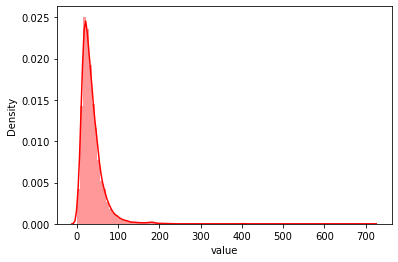

In [30]:
sns.distplot(no2_dl_gdf.value, kde=True, bins=100, color='r')
plt.show()

In [31]:
fig = px.box(no2_dl_gdf, y="value",  points="all", color_discrete_sequence=["red"], 
             title='No2 values box plot')
fig.show()

## Geo Spatial Visualization

In [33]:
## Delhi Regions 

In [35]:
no2_dl_gdf.groupby('grid_id')['value'].describe()

,count,mean,std,min,25%,50%,75%,max
grid_id,,,,,,,,
1Z2W7,476.0,47.762698,44.558161,0.000000,16.866579,31.012965,61.823815,229.617234
6EIL6,486.0,40.116741,22.692658,9.298649,23.831601,34.289270,50.866766,166.700000
7334C,395.0,41.976276,59.742113,0.000000,20.473482,30.039130,39.921428,714.027500
78V83,441.0,21.481665,12.131452,2.200000,12.326923,19.768889,28.200000,82.184444
8KNI6,475.0,38.654393,31.863724,2.275000,16.157967,28.014815,50.634184,212.946429
90S79,462.0,41.396104,24.081711,10.723077,21.502967,37.752207,53.932143,150.039062
A7UCQ,498.0,31.208228,21.223269,0.640000,14.764531,26.512705,42.197627,125.857391
AZJ0Z,441.0,30.580696,17.562554,5.675000,17.246753,27.262338,39.265672,112.264516
C7PGV,459.0,27.487612,15.794510,2.122222,16.495000,26.324051,34.342514,114.283051


In [37]:
fig = px.box(no2_dl_gdf, y="value", x="grid_id", color_discrete_sequence=["red"], 
             title='No2 values box plot by grid')
fig.show()